<a href="https://colab.research.google.com/github/moyaa05/PracticasAprendizajeAutomatico/blob/PR4/PR4/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Celda 1: Configuración
Librerías para las gráficas (matplotlib y seaborn) y conexión a Drive.

In [1]:
# 1. CONFIGURACIÓN
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from google.colab import drive

# Montar Drive
print("--- Conectando con Google Drive ---")
drive.mount('/content/drive')

# Rutas
DRIVE_FOLDER = '/content/drive/MyDrive/Practica_ISIC'
MODELS_ZIP = 'modelos_entrenados.zip' # Aquí están los archivos results.csv con el historial

--- Conectando con Google Drive ---
Mounted at /content/drive


# Celda 2: Carga de Datos
Traemos el ZIP de los modelos, porque dentro de cada carpeta de modelo hay un archivo llamado results.csv que tiene anotado lo que pasó en cada epoch.

In [2]:
# 2. CARGA DE HISTORIALES
print("--- Recuperando datos de entrenamiento ---")

# Traer y descomprimir los Modelos
if not os.path.exists('ISIC_Project'):
    print(f"Copiando y descomprimiendo {MODELS_ZIP}...")
    shutil.copy(os.path.join(DRIVE_FOLDER, MODELS_ZIP), '/content/')
    !unzip -q {MODELS_ZIP}
else:
    print("Datos ya presentes.")

print("Estructura descomprimida. Buscando archivos CSV...")

--- Recuperando datos de entrenamiento ---
Copiando y descomprimiendo modelos_entrenados.zip...
Estructura descomprimida. Buscando archivos CSV...


# Celda 3: Gráfica de Pérdida (Loss)
Comparamos cómo bajó el error en los tres modelos.

Si la línea sube al final, hay sobreajuste.

Si la línea no baja, hay subajuste.

--- Generando Gráfica de Comparación ---
✅ Gráfica guardada como 'comparativa_loss.png'


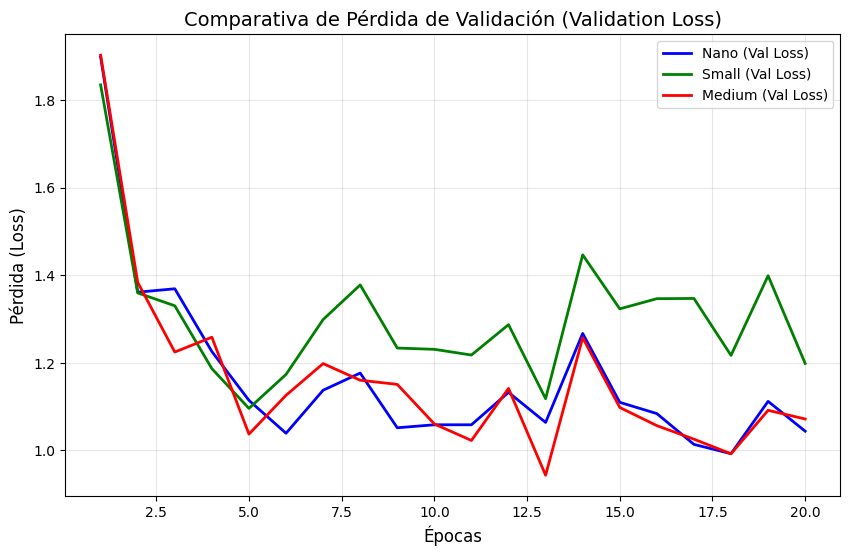

In [3]:
# 3. GENERAR GRÁFICA COMPARATIVA DE PÉRDIDA (VAL LOSS)
print("--- Generando Gráfica de Comparación ---")

modelos = ['yolov8n_run', 'yolov8s_run', 'yolov8m_run']
nombres_legibles = ['Nano', 'Small', 'Medium']
colores = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

for i, modelo in enumerate(modelos):
    csv_path = os.path.join('ISIC_Project', modelo, 'results.csv')

    if os.path.exists(csv_path):
        # YOLO a veces pone espacios en los nombres de columnas, los limpiamos
        df = pd.read_csv(csv_path)
        df.columns = [c.strip() for c in df.columns]

        # Graficamos la pérdida de validación (val/loss)
        plt.plot(df['epoch'], df['val/loss'], label=f'{nombres_legibles[i]} (Val Loss)', color=colores[i], linewidth=2)
    else:
        print(f"⚠️ No se encontró {csv_path}")

plt.title('Comparativa de Pérdida de Validación (Validation Loss)', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (Loss)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Guardamos la imagen para el informe
plt.savefig('comparativa_loss.png', dpi=300)
print("✅ Gráfica guardada como 'comparativa_loss.png'")
plt.show()

# Celda 4: Gráfica de Precisión (Accuracy)
Vamos a ver cuál acertó más.

✅ Gráfica guardada como 'comparativa_accuracy.png'


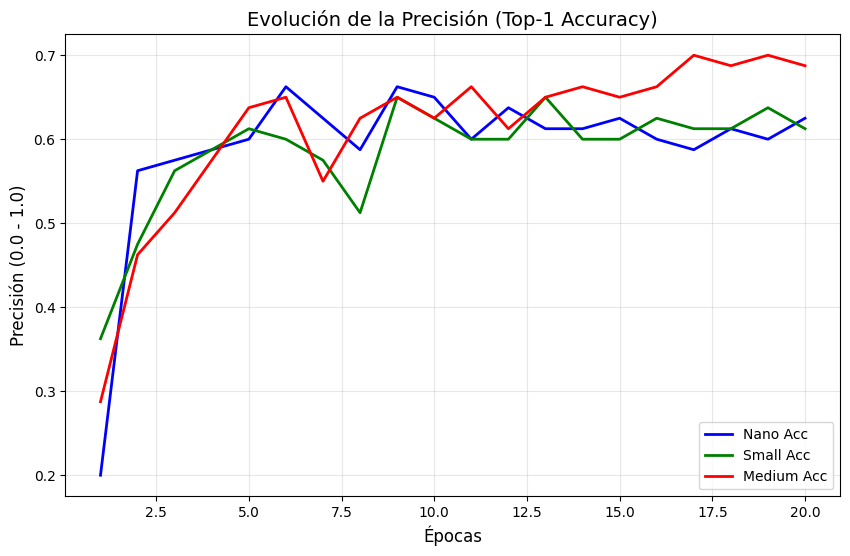

In [4]:
# 4. GENERAR GRÁFICA DE PRECISIÓN (TOP-1 ACCURACY)
plt.figure(figsize=(10, 6))

for i, modelo in enumerate(modelos):
    csv_path = os.path.join('ISIC_Project', modelo, 'results.csv')

    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df.columns = [c.strip() for c in df.columns]

        # metrics/accuracy_top1 es la columna de precisión
        plt.plot(df['epoch'], df['metrics/accuracy_top1'], label=f'{nombres_legibles[i]} Acc', color=colores[i], linewidth=2)

plt.title('Evolución de la Precisión (Top-1 Accuracy)', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión (0.0 - 1.0)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.savefig('comparativa_accuracy.png', dpi=300)
print("✅ Gráfica guardada como 'comparativa_accuracy.png'")
plt.show()

# Celda 5: Generar Tabla LaTeX
Esta parte no es necesaria, la hacemos nosotros para adelantar ya de cara al LaTex, para facilitar luego el hacer la tabla de resultados.

In [5]:
# 5. GENERAR TABLA PARA LATEX
print("--- Generando Tabla Resumen ---")

datos_tabla = []

for i, modelo in enumerate(modelos):
    csv_path = os.path.join('ISIC_Project', modelo, 'results.csv')
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df.columns = [c.strip() for c in df.columns]

        # Cogemos el valor de la MEJOR época (menor loss o mayor accuracy)
        # Usaremos el máximo accuracy alcanzado.
        mejor_acc = df['metrics/accuracy_top1'].max()
        mejor_loss = df['val/loss'].min()

        datos_tabla.append({
            'Modelo': nombres_legibles[i],
            'Top-1 Acc': f"{mejor_acc:.2%}",
            'Min Loss': f"{mejor_loss:.4f}"
        })

print("\nFormato que usaremos en el informe LaTeX:\n")
print("\\begin{table}[ht]")
print("\\centering")
print("\\begin{tabular}{|l|c|c|}")
print("\\hline")
print("Modelo & Top-1 Accuracy & Min Val Loss \\\\")
print("\\hline")
for fila in datos_tabla:
    print(f"{fila['Modelo']} & {fila['Top-1 Acc']} & {fila['Min Loss']} \\\\")
print("\\hline")
print("\\end{tabular}")
print("\\caption{Comparativa de rendimiento de los modelos YOLOv8}")
print("\\label{tab:resultados}")
print("\\end{table}")

--- Generando Tabla Resumen ---

Formato que usaremos en el informe LaTeX:

\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Modelo & Top-1 Accuracy & Min Val Loss \\
\hline
Nano & 66.25% & 0.9927 \\
Small & 65.00% & 1.0962 \\
Medium & 70.00% & 0.9435 \\
\hline
\end{tabular}
\caption{Comparativa de rendimiento de los modelos YOLOv8}
\label{tab:resultados}
\end{table}


# Celda 6: Descargar todo
Empaquetamos las gráficas generadas (.png) para descargarlas en el ordenador y meterlas en el PDF.

In [6]:
# 6. RECOPILACIÓN Y DESCARGA FINAL
import glob
from google.colab import files

print("--- 1. Preparando gráficas de este cuaderno ---")
archivos_a_descargar = ['comparativa_loss.png', 'comparativa_accuracy.png']

print("--- 2. Recuperando Matrices de Confusión (del notebook anterior) ---")
# Ruta donde guardamos el zip en eval.ipynb
zip_eval_drive = os.path.join(DRIVE_FOLDER, 'evaluacion_resultados.zip')
zip_eval_local = 'evaluacion_resultados.zip'

if os.path.exists(zip_eval_drive):
    # Traemos el zip de evaluación
    shutil.copy(zip_eval_drive, zip_eval_local)
    # Lo descomprimimos
    !unzip -q -o {zip_eval_local}

    # Buscamos las imágenes .png dentro de las carpetas descomprimidas
    # La estructura es algo así como: ISIC_Evaluation/yolov8n_run/confusion_matrix.png
    matrices_encontradas = glob.glob('ISIC_Evaluation/*/*confusion_matrix.png')

    for ruta_origen in matrices_encontradas:
        # Extraemos el nombre del modelo de la carpeta (ej: yolov8n_run)
        nombre_modelo = ruta_origen.split(os.sep)[-2]

        # Creamos un nombre claro para el archivo final
        nombre_final = f"matriz_{nombre_modelo}.png"

        # Lo movemos a la carpeta principal para descargarlo fácil
        shutil.copy(ruta_origen, nombre_final)
        archivos_a_descargar.append(nombre_final)
        print(f"   -> Recuperada: {nombre_final}")
else:
    print("⚠️ No se encontró 'evaluacion_resultados.zip' en Drive. Solo se descargarán las comparativas.")

print("\n--- 3. Iniciando descarga al PC ---")
for archivo in archivos_a_descargar:
    if os.path.exists(archivo):
        print(f"Descargando: {archivo}")
        files.download(archivo)
    else:
        print(f"Error: No se encuentra {archivo}")

--- 1. Preparando gráficas de este cuaderno ---
--- 2. Recuperando Matrices de Confusión (del notebook anterior) ---
   -> Recuperada: matriz_yolov8s_run.png
   -> Recuperada: matriz_yolov8m_run.png
   -> Recuperada: matriz_yolov8n_run.png

--- 3. Iniciando descarga al PC ---
Descargando: comparativa_loss.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: comparativa_accuracy.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: matriz_yolov8s_run.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: matriz_yolov8m_run.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: matriz_yolov8n_run.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>